In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_csv('titanic.csv')

In [74]:
print(df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [75]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [77]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [78]:
target = df['Survived']
inputs = df[['Pclass','Sex','Age','Fare']]

In [79]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,28.0,23.4500
889,1,male,26.0,30.0000


In [80]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [82]:
inputs['sex']=le_sex.fit_transform(inputs['Sex'])

C:\Users\USER\AppData\Local\Temp\ipykernel_8312\3550556033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['sex']=le_sex.fit_transform(inputs['Sex'])


In [83]:
inputs

,Pclass,Sex,Age,Fare,sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,28.0,23.4500,0
889,1,male,26.0,30.0000,1


In [84]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [85]:
ninputs = inputs.drop(['Sex'],axis='columns') 
ninputs

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [86]:
tree_model.fit(ninputs,target)

DecisionTreeClassifier()

In [87]:
tree_model.score(ninputs,target)

0.9775533108866442

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(ninputs, target, train_size=0.7)

In [89]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [90]:
tree_model.score(x_test, y_test)

0.7761194029850746

In [96]:
from sklearn.linear_model import LogisticRegression 

In [97]:
log_model = LogisticRegression()

In [98]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [99]:
log_model.score(x_test, y_test)

0.7611940298507462

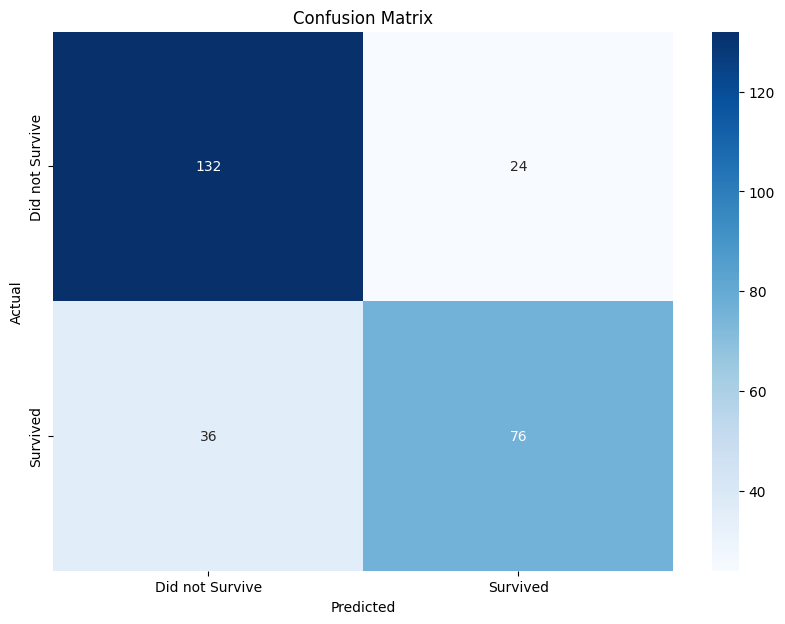

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_model.predict(x_test))

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show plot
plt.show()
